In [208]:
#Import packages 
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


In [ ]:
#10x genomics – dataset pbmc -2017
#Purified different cell populations (beads/antibodies) 
#10 different populations measured separately 
#Take these different populations and use them as classifiers 
#We want to concatenate the files together

In [3]:
#Import the data: path: /ifs/obds-training/apr20/exercises/machine_learning/data
#First just going to upload one data file to see what it looks like
Bcells = pd.read_csv('/ifs/obds-training/apr20/exercises/machine_learning/data/b_cells.gz')
Bcells

#Cells in rows, genes across top in columns
#Can see that there are 400 cells for each file in this list

,A1BG,AAAS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARSD1,AASDHPPT,...,ZNHIT3,ZNHIT6,ZNRD1,ZRANB2,ZRSR2,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSWIM7,ZYX
0,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,9.225092,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,3.026634,0.0,0,0,0.0,0.0,0.0,0.000000,...,3.026634,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.026634,0.0
4,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,8.503401,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,5.370569,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
396,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
397,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
398,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [6]:
#Datasets import as list 
data_sets = os.listdir("/ifs/obds-training/apr20/exercises/machine_learning/data/")
data_sets

['21_05_2020_sumeet.ipynb',
 '.ipynb_checkpoints',
 'naive_t.gz',
 'cd56_nk.gz',
 'memory_t.gz',
 'cd4_t_helper.gz',
 'cd34.gz',
 'regulatory_t.gz',
 'b_cells.gz',
 'cd14_monocytes.gz',
 'cytotoxic_t.gz',
 'naive_cytotoxic.gz']

In [7]:
#Remove Summet's notebook and the other one
data_sets2 = data_sets[2:]
data_sets2

['naive_t.gz',
 'cd56_nk.gz',
 'memory_t.gz',
 'cd4_t_helper.gz',
 'cd34.gz',
 'regulatory_t.gz',
 'b_cells.gz',
 'cd14_monocytes.gz',
 'cytotoxic_t.gz',
 'naive_cytotoxic.gz']

In [8]:
data_list = [pd.read_csv(file) for file in data_sets2]
#Use a list to use a for loop to read files in and store throguh the list

In [209]:
data_list #Shows you the 10 files as dataframes/arrays in the list 

[         A1BG      AAAS  AAED1  AAGAB  AAK1  AAMDC  AAMP      AAR2    AARSD1  \
 0    0.000000  7.722008    0.0    0.0   0.0    0.0   0.0  7.722008  0.000000   
 1    0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 2    0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 3    8.488964  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  8.488964   
 4    0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 ..        ...       ...    ...    ...   ...    ...   ...       ...       ...   
 395  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 396  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 397  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 398  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 399  0.000000  0.000000    0.0    0.0   0.0    0.0   0.0  0.000000  0.000000   
 
      AASDHPPT  ...  ZNHIT

In [210]:
#convert into a dataframe by concantenating the data (gives 10 filesx400cells as one)
all_data = pd.concat(data_list) 

In [211]:
#Make a variable to give an identifier of where the cell came from for downstream plotting/ highlight which cells are which
#data_set2 contains the list - repeat this 400 times
data_sets3 = np.repeat(data_sets2,400)
data_sets3 #Dont want this in the data, just want it for the plotting to use as values

array(['naive_t.gz', 'naive_t.gz', 'naive_t.gz', ...,
       'naive_cytotoxic.gz', 'naive_cytotoxic.gz', 'naive_cytotoxic.gz'],
      dtype='<U18')

In [212]:
#Run UMAP #doesnt work with pd dataframe(have to add.values) Use umap with 20 neighbours to get lower dim for plotting
umap_instance = UMAP(n_neighbors = 20)
umap_transformed = umap_instance.fit_transform(all_data.values) #all data is the concatenated data

In [213]:
#convert to a dataframe to allow plotting 
data_frame = pd.DataFrame(umap_transformed)
data_frame
#0 and 1 are the 

,0,1
0,13.401641,13.714241
1,13.608100,14.009513
2,14.408946,13.729893
3,14.674374,14.210356
4,14.388257,13.213568
...,...,...
3995,15.200777,10.893840
3996,15.482391,11.088069
3997,15.541475,11.535942
3998,14.891979,10.579498


In [214]:
#Add column to dataframe to give it labels - identifier from origin file the samples came from 
data_frame['labels']=data_sets3
data_frame

,0,1,labels
0,13.401641,13.714241,naive_t.gz
1,13.608100,14.009513,naive_t.gz
2,14.408946,13.729893,naive_t.gz
3,14.674374,14.210356,naive_t.gz
4,14.388257,13.213568,naive_t.gz
...,...,...,...
3995,15.200777,10.893840,naive_cytotoxic.gz
3996,15.482391,11.088069,naive_cytotoxic.gz
3997,15.541475,11.535942,naive_cytotoxic.gz
3998,14.891979,10.579498,naive_cytotoxic.gz


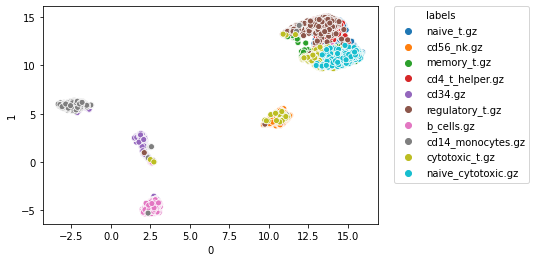

In [215]:
#Run this using hue='labels' to colour the clusters by identity
UMAP = sns.scatterplot(data = data_frame, x=0, y=1, hue='labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Plot outside legend of the figure

UMAP


In [216]:
#Split data into train and test and run decision tree
#Use “from sklearn.model_selection import train_test_split”
#Split the data and the labels into 0.25 test data 
#all_data contains the data from all 10 files, data_sets3 is the labels 
#Can set the randomness 

data_train, data_test, labels_train, labels_test = train_test_split(all_data, data_sets3, test_size = 0.25)


In [217]:
labels_train

array(['naive_cytotoxic.gz', 'regulatory_t.gz', 'regulatory_t.gz', ...,
       'cytotoxic_t.gz', 'cytotoxic_t.gz', 'cytotoxic_t.gz'], dtype='<U18')

In [218]:
#Train the decisions tree classfiier
#initialises
clf = DecisionTreeClassifier() #creates classifier from sklearn
#train on training data
clf = clf.fit(data_train, labels_train) #creates rules for the different types to identify


In [219]:
#Now want a score of how well the model is performing. This gives you how many times (68% correct)
clf.score(data_test, labels_test)

0.68

In [220]:
#See how much overfitting by looking at how it fits 
clf.score(data_train, labels_train)

1.0

In [221]:
#Random foreist(overfits less)
clf_forest = RandomForestClassifier(n_estimators=250)
clf_forest = clf_forest.fit(data_train, labels_train)

In [222]:
clf_forest.score(data_test, labels_test)

0.831

In [223]:
clf_forest.score(data_train, labels_train)

1.0

In [224]:
#The model is overfitting - going to try and use random forest to see if this helps
#This will identify the genes that gives you the most important information to split the dataset
#How frequently each individual gene is picked as the best gene to classify samples
#average power of each gene to identify populations
#Amost a way of doing find varible features
#The importance for each feature it uses gnes to classify
feature_importances = pd.DataFrame(clf_forest.feature_importances_, index=all_data.columns, columns=['importance']).sort_values('importance', ascending = False)

In [225]:
feature_importances.head(n=10)
#The values of these - doesn't really have a scale - not a measure of variance, just information
#What discrimination power you have through that particular gene
#How useful it is to distinguish between those 10 catergories


,importance
CD74,0.009764
CD79A,0.007459
HLA-DRA,0.007341
RPS27,0.007259
GNLY,0.007231
CD8B,0.006962
B2M,0.006876
HLA-DRB1,0.006865
NKG7,0.006317
CST3,0.006147


In [226]:
#Choose another two classifiers from skikit list and repeat using kneighbors classifer as first explamble
#This is like the kernels - different ways to create the predictive model
clf_nearest = KNeighborsClassifier()
clf_nearest = clf_nearest.fit(data_train,labels_train)

In [227]:
clf_nearest.score(data_test, labels_test)

0.667

In [228]:
clf_nearest.score(data_train, labels_train)

0.7733333333333333

In [229]:
#linear model 
clf_linear = LinearSVC(max_iter=10000)
clf_linear = clf_linear.fit(data_train, labels_train)
#Test on test dataset
clf_linear.score(data_test, labels_test)

0.881

In [230]:
#Look at training set
clf_linear.score(data_train, labels_train)

1.0

In [231]:
#We've compared multiple models - now want to look at the miscalculation
#Calculate confusionmatrix - evaluates the accuracy
forest_predict = clf_forest.predict(data_test)
forest_predict[:20,]

array(['cd4_t_helper.gz', 'naive_cytotoxic.gz', 'naive_cytotoxic.gz',
       'regulatory_t.gz', 'naive_cytotoxic.gz', 'naive_cytotoxic.gz',
       'cd56_nk.gz', 'cd56_nk.gz', 'b_cells.gz', 'naive_t.gz',
       'b_cells.gz', 'cd56_nk.gz', 'cd4_t_helper.gz', 'cd56_nk.gz',
       'naive_t.gz', 'cd56_nk.gz', 'naive_t.gz', 'regulatory_t.gz',
       'naive_cytotoxic.gz', 'b_cells.gz'], dtype='<U18')

In [232]:
#Make confusions matrix from the forest predict 
Z= confusion_matrix(labels_test, forest_predict)
Z
#Values on the diagonal 

array([[ 98,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 107,   0,   0,   0,   0,   0,   0,   0,   2],
       [ 10,   5,  78,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,  47,   0,   0,   1,   0,  31,  25],
       [  0,   0,   0,   0,  94,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,  68,   1,  26,   0,   2],
       [  0,   0,   0,   0,   0,   5,  93,   2,   0,   3],
       [  0,   0,   0,   0,   0,   1,   2, 101,   1,   0],
       [  0,   0,   0,  14,   0,   0,   0,   1,  86,   4],
       [  0,   0,   0,  13,   0,   0,   0,   0,  16,  59]])

In [233]:
#Turn this into a dataframe 
#Diagnonal errors are where it's true and matches, 
#where it's not on the diagonal is where it's failing 
pd.DataFrame(Z, index = data_sets2, columns= data_sets2)

,naive_t.gz,cd56_nk.gz,memory_t.gz,cd4_t_helper.gz,cd34.gz,regulatory_t.gz,b_cells.gz,cd14_monocytes.gz,cytotoxic_t.gz,naive_cytotoxic.gz
naive_t.gz,98,0,0,0,0,0,0,0,0,0
cd56_nk.gz,0,107,0,0,0,0,0,0,0,2
memory_t.gz,10,5,78,0,0,1,0,0,0,0
cd4_t_helper.gz,0,0,0,47,0,0,1,0,31,25
cd34.gz,0,0,0,0,94,0,0,0,0,0
regulatory_t.gz,0,0,0,0,3,68,1,26,0,2
b_cells.gz,0,0,0,0,0,5,93,2,0,3
cd14_monocytes.gz,0,0,0,0,0,1,2,101,1,0
cytotoxic_t.gz,0,0,0,14,0,0,0,1,86,4
naive_cytotoxic.gz,0,0,0,13,0,0,0,0,16,59


In [234]:
#How would you try and improve this?


In [235]:
#Run forest_predict on whole dataset to generate UMAP
predicted = clf_forest.predict(all_data)
predicted

array(['naive_t.gz', 'naive_t.gz', 'naive_t.gz', ...,
       'naive_cytotoxic.gz', 'naive_cytotoxic.gz', 'naive_cytotoxic.gz'],
      dtype='<U18')

In [236]:
#Add the random forest labels to the dataframe so they have the predicted labels and original
new_df = data_frame
new_df['predicted'] = predicted
new_df

,0,1,labels,predicted
0,13.401641,13.714241,naive_t.gz,naive_t.gz
1,13.608100,14.009513,naive_t.gz,naive_t.gz
2,14.408946,13.729893,naive_t.gz,naive_t.gz
3,14.674374,14.210356,naive_t.gz,naive_t.gz
4,14.388257,13.213568,naive_t.gz,naive_t.gz
...,...,...,...,...
3995,15.200777,10.893840,naive_cytotoxic.gz,naive_cytotoxic.gz
3996,15.482391,11.088069,naive_cytotoxic.gz,naive_cytotoxic.gz
3997,15.541475,11.535942,naive_cytotoxic.gz,naive_cytotoxic.gz
3998,14.891979,10.579498,naive_cytotoxic.gz,naive_cytotoxic.gz


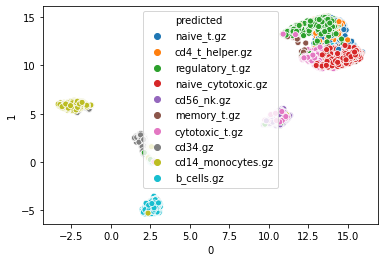

In [237]:
#Replot UMAP
UMAP2 = sns.scatterplot(data = new_df, x=0, y=1, hue='predicted')

UMAP2

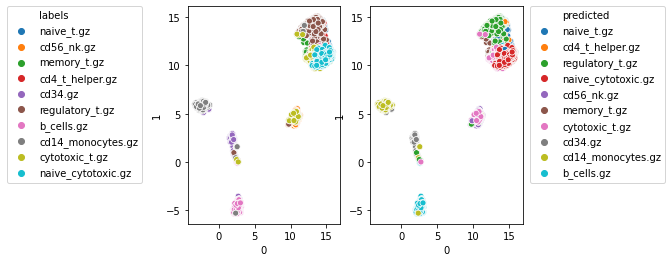

In [238]:
#Print the plots next to each other for labels and predicted 
fig, (ax1, ax2) =plt.subplots(1,2)
sns.scatterplot(data = new_df, x=0, y=1, hue='labels', ax=ax1)
ax1.legend(bbox_to_anchor=(-0.30, 1), loc=1, borderaxespad=0.)
sns.scatterplot(data = new_df, x=0, y=1, hue='predicted', ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Plot outside legend of the figure
fig.show()

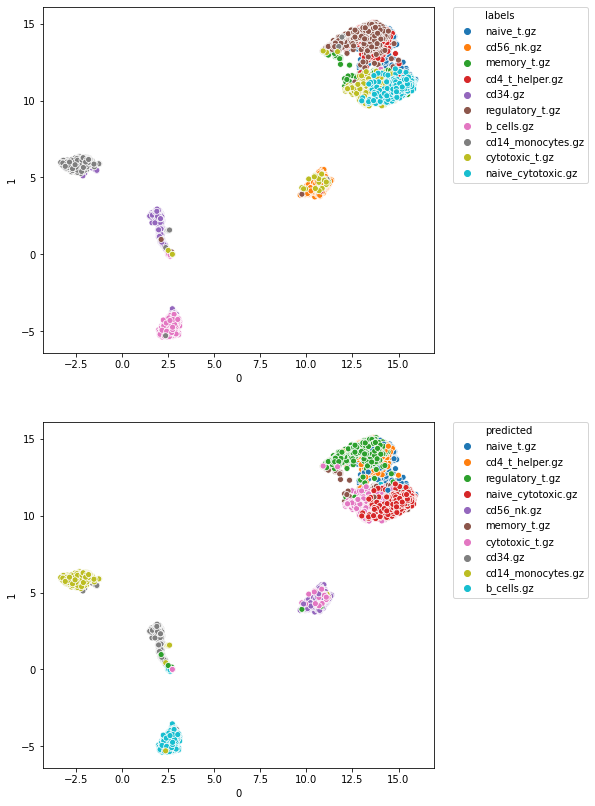

In [239]:
#Or can make it horizontally by altering the labels and figure size
#Alter wether its horizontal or vertical by the arrangement of 
fig, (ax1, ax2) =plt.subplots(2,1, figsize = (7,14))
sns.scatterplot(data = new_df, x=0, y=1, hue='labels', ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.scatterplot(data = new_df, x=0, y=1, hue='predicted', ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Plot outside legend of the figure
fig.show()

In [245]:
#Going to rerun the UMAP on logged data
#umap_instance = UMAP(n_neighbors = 20)
umap_transformed2 = umap_instance.fit_transform(np.log(all_data.values+1)) #all data is the concatenated data

In [247]:
#Recreate dataframe as pandas dateframe

dataframe_log = pd.DataFrame(umap_transformed2)
dataframe_log

,0,1
0,-1.429566,-0.781230
1,-0.779654,-0.970942
2,-1.466940,-0.163028
3,-2.049679,0.396140
4,-1.984502,1.391849
...,...,...
3995,-0.611463,-0.192960
3996,-0.462204,-0.725991
3997,-0.537477,-0.580922
3998,-1.297765,-0.082123


In [248]:
#Add the labels
dataframe_log['labels'] = data_sets3
dataframe_log['predicted'] = predicted
dataframe_log

,0,1,labels,predicted
0,-1.429566,-0.781230,naive_t.gz,naive_t.gz
1,-0.779654,-0.970942,naive_t.gz,naive_t.gz
2,-1.466940,-0.163028,naive_t.gz,naive_t.gz
3,-2.049679,0.396140,naive_t.gz,naive_t.gz
4,-1.984502,1.391849,naive_t.gz,naive_t.gz
...,...,...,...,...
3995,-0.611463,-0.192960,naive_cytotoxic.gz,naive_cytotoxic.gz
3996,-0.462204,-0.725991,naive_cytotoxic.gz,naive_cytotoxic.gz
3997,-0.537477,-0.580922,naive_cytotoxic.gz,naive_cytotoxic.gz
3998,-1.297765,-0.082123,naive_cytotoxic.gz,naive_cytotoxic.gz


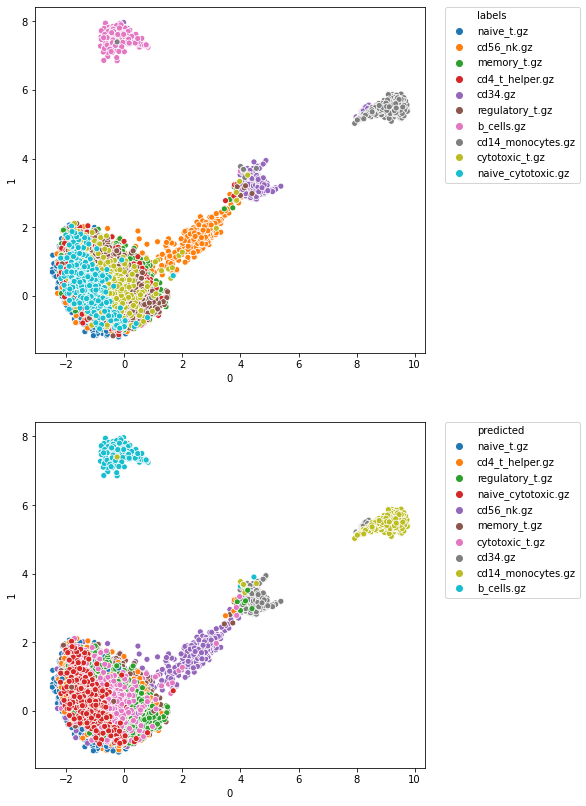

In [249]:
#Make the same plot for the logged data
fig, (ax1, ax2) =plt.subplots(2,1, figsize = (7,14))
sns.scatterplot(data = dataframe_log, x=0, y=1, hue='labels', ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.scatterplot(data = dataframe_log, x=0, y=1, hue='predicted', ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Plot outside legend of the figure
fig.show()